**Bigger Goal** is to distinguish between songs that I merely *like* and songs that I *love*

###Loading the data

In [2]:
import requests
import json
import spotipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import sys


import playlist_data


In [4]:
USERNAME = 'dbgoldberg01'
favorites = playlist_data.main(USERNAME, 'science')
favorites.head()

Setting up
getting playlist tracks from spotify
merge with artist info from echo nest
0
10
20
30
40
50
60
error getting track artist data for  None
70
80
90
merge with track info from echo nest
0
error on uri spotify:track:76GGyeUiOtzsZjCxIJGDpd index= 1
error on uri spotify:track:6XPC7ZNTJcnWzQaLZYe3od index= 3
error on uri spotify:track:5KFdwLvJ0Bokm0TFlSPq47 index= 8
10
error on uri spotify:track:1o22EcqsCANhwYdaNOSdwS index= 11
error on uri spotify:track:3xqxETvPg43KWP0HOGiOmu index= 12
error on uri spotify:track:4llDF3RuBQYj2nkjTCJY4w index= 14
error on uri spotify:track:4Ddaf5bxzGfW1Ut2UtpTUl index= 20
20
error on uri spotify:track:7c13Xlndg43PnSzpHRD11d index= 21
error on uri spotify:track:69CKj4XCzIY89pYoiAaHwP index= 29
error on uri spotify:track:69CKj4XCzIY89pYoiAaHwP index= 30
30
error on uri spotify:track:69CKj4XCzIY89pYoiAaHwP index= 31
error on uri spotify:track:57V3qFWPxsUB3PTFQbWyDk index= 32
error on uri spotify:track:49HEwdXGHQkcApPc9YzdXZ index= 33
error on uri spoti

,track_name,track_id,track_uri,track_popularity,added_at,album_name,album_id,album_uri,artist_name,artist_id,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Graceland,3lbRocWWpBVO9eefdjGi60,spotify:track:3lbRocWWpBVO9eefdjGi60,12,2015-09-16T22:33:32Z,Graceland (2011 Remaster),4O7d2vnCa5sfyZph6gU4sa,spotify:album:4O7d2vnCa5sfyZph6gU4sa,Paul Simon,2CvCyf1gEVhI0mX6aFXmVI,...,0.690819,4.685153e-04,1,0.079664,-9.653,0,0.033910,117.932,4,0.868158
1,Speak In,76GGyeUiOtzsZjCxIJGDpd,spotify:track:76GGyeUiOtzsZjCxIJGDpd,0,2015-09-16T22:33:32Z,It Could Just Be This Place,14M1Is6t3MOkxjBynarKce,spotify:album:14M1Is6t3MOkxjBynarKce,not an Airplane,2eTQ0GfNG2zrAghLUKkSas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Funeral,4o0NjemqhmsYLIMwlcosvW,spotify:track:4o0NjemqhmsYLIMwlcosvW,76,2015-09-16T22:33:32Z,Everything All The Time,5uMfshtC2Jwqui0NUyUYIL,spotify:album:5uMfshtC2Jwqui0NUyUYIL,Band of Horses,0OdUWJ0sBjDrqHygGUXeCF,...,0.768954,7.311096e-08,0,0.092790,-5.283,0,0.042186,122.507,4,0.111796
3,Open Season,6XPC7ZNTJcnWzQaLZYe3od,spotify:track:6XPC7ZNTJcnWzQaLZYe3od,43,2015-09-16T22:33:32Z,Open Season,3vyA5G1a5ISREXX0A4D2Iv,spotify:album:3vyA5G1a5ISREXX0A4D2Iv,High Highs,1cXVTtkpqSXVhyD32f9MS4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Artificial Light,2Y93hToFlR6CBItrUqsGqG,spotify:track:2Y93hToFlR6CBItrUqsGqG,40,2015-09-16T22:33:32Z,White Lighter,4cPNeJTCwhYoJJ8sfqLOCB,spotify:album:4cPNeJTCwhYoJJ8sfqLOCB,Typhoon,6p6WlxIkeWH8yOYvciFfVl,...,0.536411,2.085726e-01,2,0.357705,-8.108,1,0.044852,89.811,4,0.358969


In [5]:
# reload(playlist_data)
justlike = playlist_data.main(USERNAME, 'justlike')
justlike.head()

Setting up
getting playlist tracks from spotify
merge with artist info from echo nest
0
10
20
merge with track info from echo nest
0
error on uri spotify:track:5iKoarDSV0EA1JN10Bljr5 index= 5
error on uri spotify:track:52PQErfILpXit6fODq43UL index= 8
10
error on uri spotify:track:4g9MgFNA9Kb63JRwpuMtVB index= 13
error on uri spotify:track:7AThm81bz0E8g7jaLzynPQ index= 14
error on uri spotify:track:4I3YxhCTk88ClnlBbtDaK0 index= 16
error on uri spotify:track:57mSiuAbNKodMxhysZlKbN index= 18
20
error on uri spotify:track:71cUqXJ3h1r0Ees6YdENLU index= 24
error on uri spotify:track:73cUDxWzUOtoLbJdeVvydw index= 26
error on uri spotify:track:0HPCLfG38YNyay8Erznli1 index= 28


,track_name,track_id,track_uri,track_popularity,added_at,album_name,album_id,album_uri,artist_name,artist_id,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Weird Fishes / Arpeggi,3hyI2HLQxWPtoT8Or2e5Rk,spotify:track:3hyI2HLQxWPtoT8Or2e5Rk,38,2015-09-17T16:26:46Z,Live from Beacon Theatre,4EswoYiuj1pBOMFO33lC39,spotify:album:4EswoYiuj1pBOMFO33lC39,Umphrey's McGee,7mQilAy42MqNPqUFqK4Z0o,...,0.622539,0.330460,11,0.612415,-10.003,0,0.036251,157.278,4,0.303008
1,Sleep The Clock Around,63rPrnI0X6gU3US3KxKL64,spotify:track:63rPrnI0X6gU3US3KxKL64,4,2015-09-17T16:26:46Z,The Boy With The Arab Strap,3uhUPlgihiYPLc0Wuhy31V,spotify:album:3uhUPlgihiYPLc0Wuhy31V,Belle & Sebastian,4I2BJf80C0skQpp1sQmA0h,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Penelope,7meVBPjEcIQ9RIST78kNcB,spotify:track:7meVBPjEcIQ9RIST78kNcB,5,2015-09-17T16:26:46Z,Blue Screen Life,0TNBqCtt1n1IE7N8cFDzXX,spotify:album:0TNBqCtt1n1IE7N8cFDzXX,Pinback,4ZWvN9FEfdTea1SEHjpTNi,...,0.478389,0.757876,7,0.115946,-14.938,1,0.037901,117.896,4,0.520831
3,Kaputt,0hvcIDobOkiw5Xq1SK3dbj,spotify:track:0hvcIDobOkiw5Xq1SK3dbj,13,2015-09-17T16:26:46Z,Kaputt,1clYDgHxfhzxWQJH0ieRpx,spotify:album:1clYDgHxfhzxWQJH0ieRpx,Destroyer,22ojy4H4ZVpowC4lRRC8In,...,0.717274,0.147508,4,0.175701,-8.944,1,0.034422,109.994,4,0.582023
4,Tangible Intangible,1qBQw98D0JIXvEXtoRUd2Z,spotify:track:1qBQw98D0JIXvEXtoRUd2Z,48,2015-09-17T16:26:46Z,Quartz (Extended Edition),6demkOx0AElVCCqmItJ9hn,spotify:album:6demkOx0AElVCCqmItJ9hn,Fly Golden Eagle,7r2alhL2KKfbhgGuqL9LGg,...,0.709572,0.000585,2,0.144467,-8.612,1,0.027993,104.069,4,0.594914


In [ ]:
import seaborn as sns
relavent_columns = ['track_popularity','discovery','familiarity',
                   'hotttnesss','acousticness','danceability','duration',
                    'energy','instrumentalness','key','liveness',
                    'loudness', 'mode', 'speechiness','tempo','time_signature',
                    'valence']
fvs_data = favorites[relavent_columns]
for c in relavent_columns:  
    plt.figure()
    sns.boxplot(fvs_data[c])
plt.show()

In [116]:
df1 = favorites[relavent_columns]
df1['love'] = 1
df2 = justlike[relavent_columns]
df2['love'] = 0
df_all = df1.append(df2, ignore_index=True)
df_all = df_all.reindex(np.random.permutation(df_all.index))
df_all.head()

/Users/davidgoldberg/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/davidgoldberg/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,track_popularity,discovery,familiarity,hotttnesss,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,love
47,19,0.452694,0.570959,0.604701,0.417886,0.285501,115.57333,0.950274,0.000004,9,0.572292,-5.580,0,0.082030,181.162,4,0.676426,1
82,29,0.475065,0.592599,0.656755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
31,7,0.460725,0.584754,0.628971,0.189323,0.516421,268.46621,0.581771,0.000040,8,0.098614,-7.274,1,0.024985,101.525,4,0.576920,1
108,51,0.301186,0.807914,0.652139,0.091857,0.522367,295.81288,0.856504,0.615333,8,0.140072,-7.915,1,0.036354,76.759,4,0.440240,0
118,13,0.295082,0.863047,0.768887,0.937504,0.429941,270.56000,0.116803,0.911438,2,0.089650,-22.249,1,0.036978,87.805,4,0.407077,0


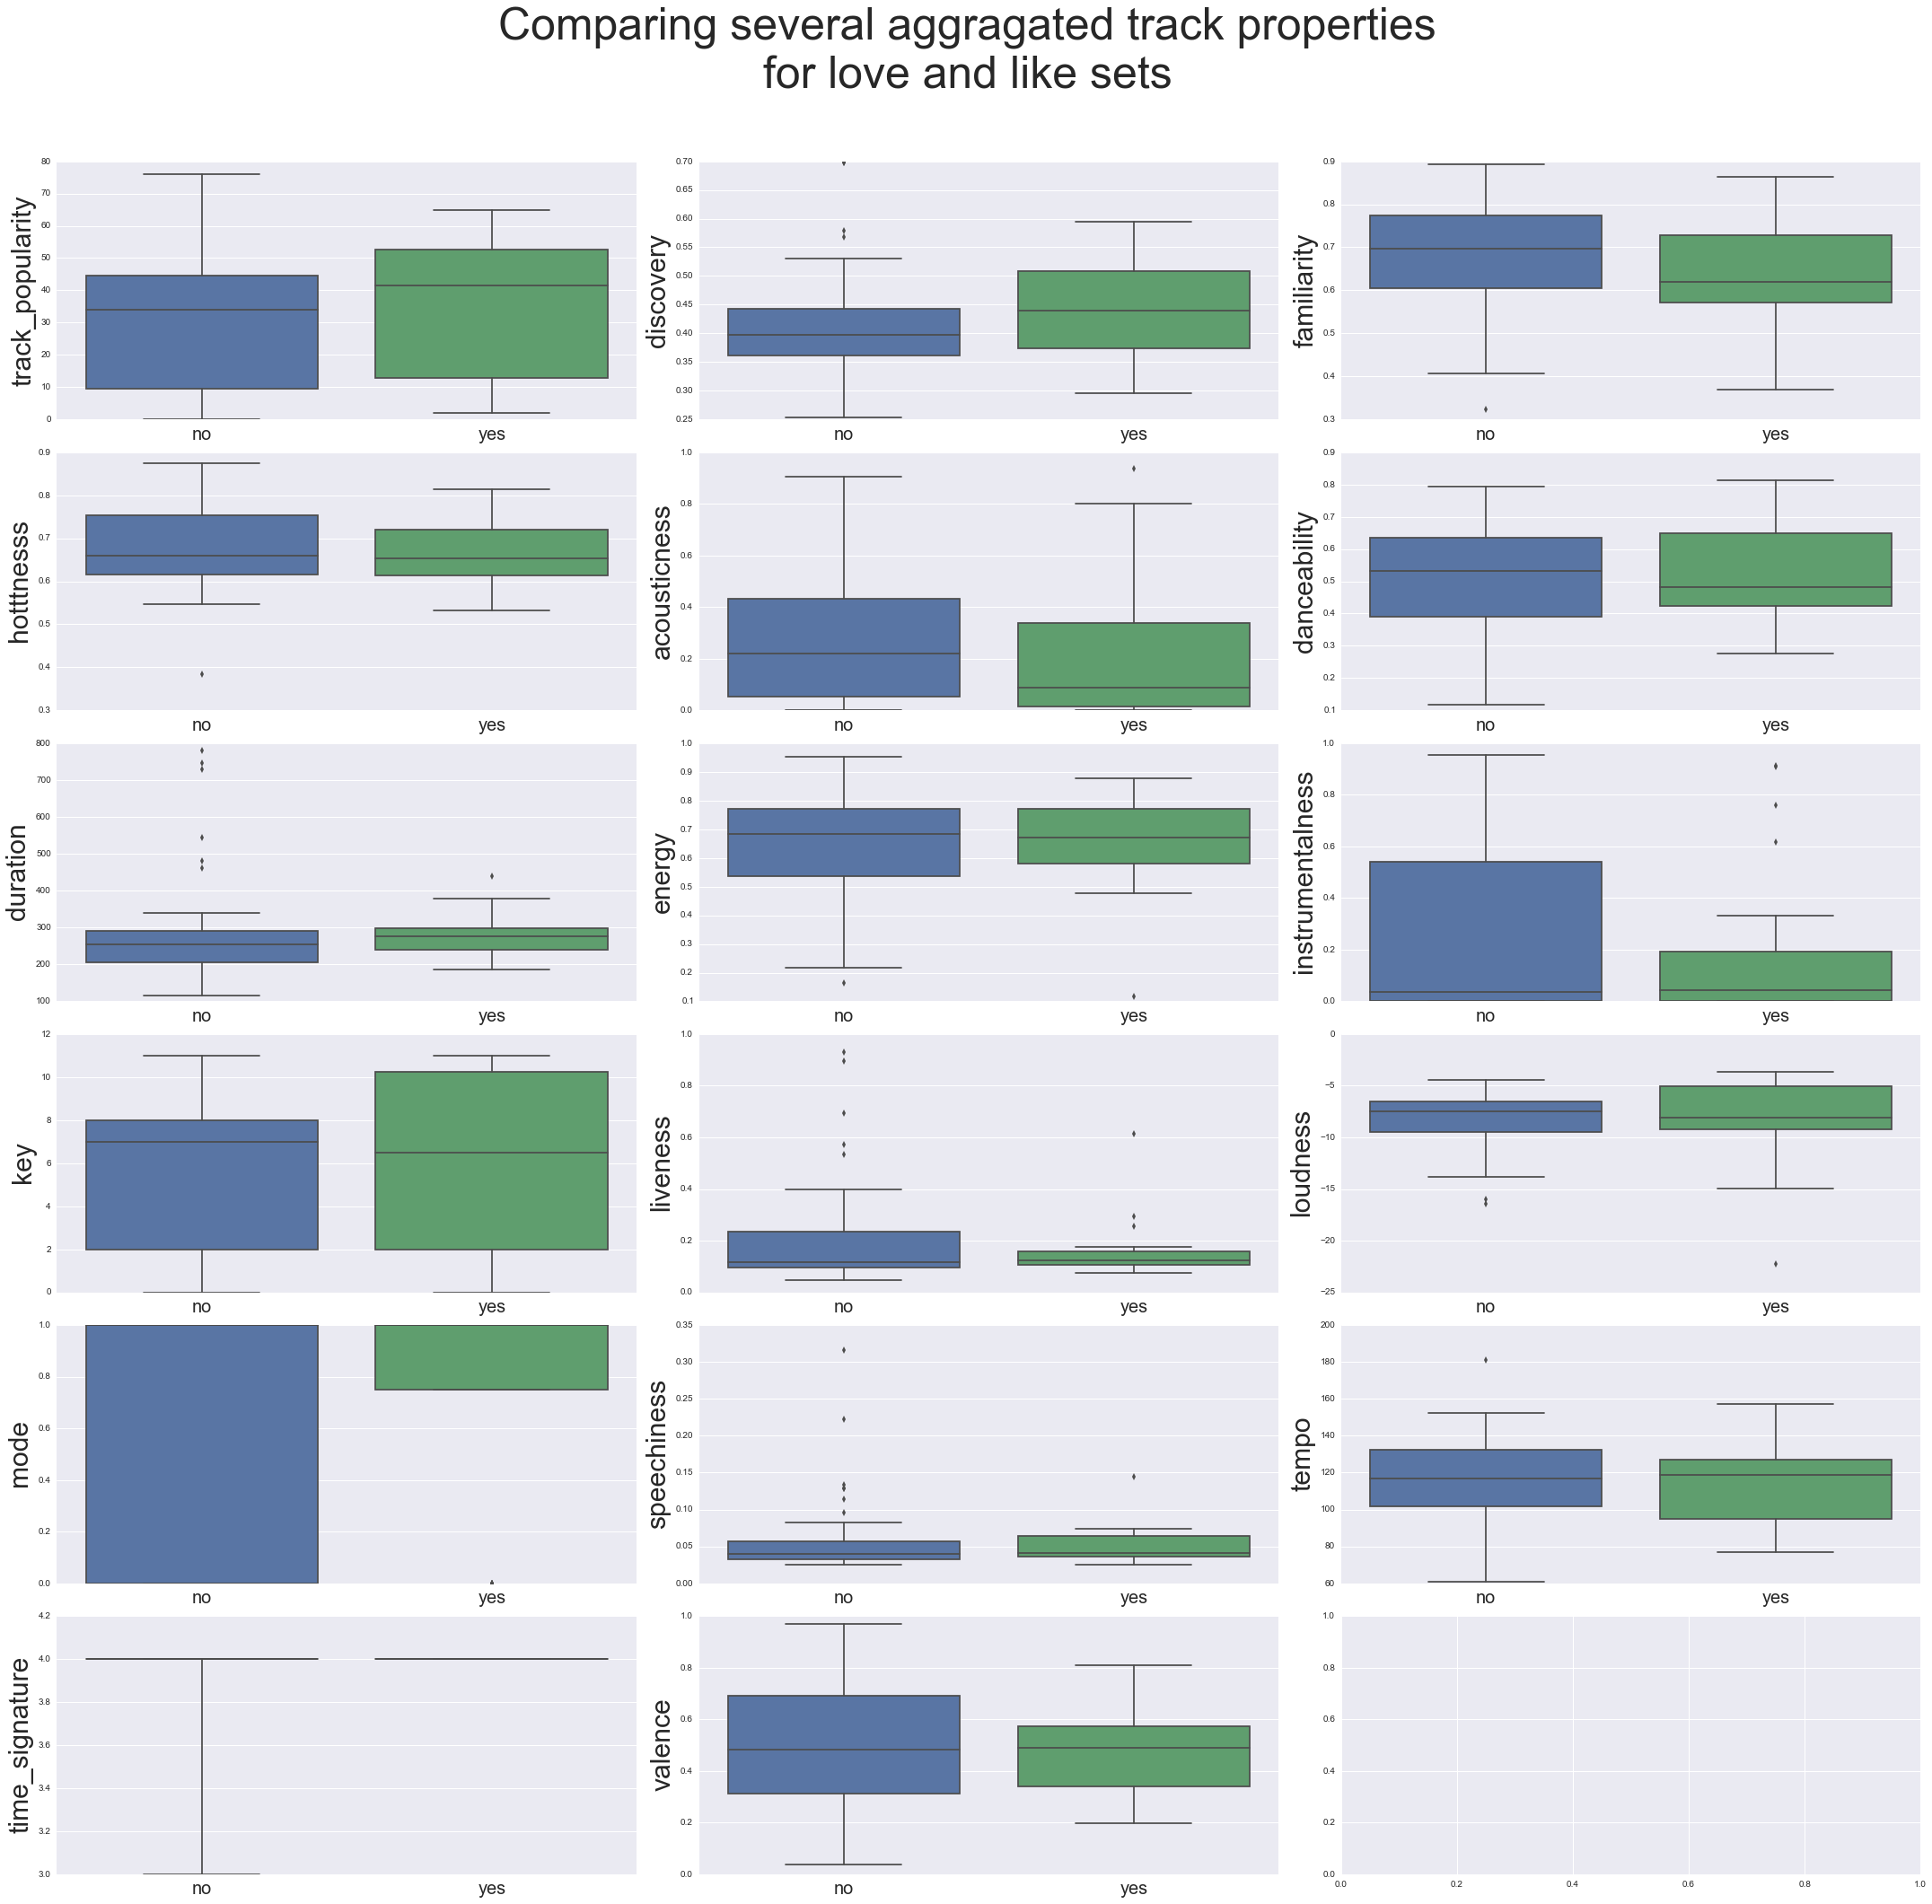

In [132]:
import seaborn as sns
relavent_columns = ['track_popularity','discovery','familiarity',
                   'hotttnesss','acousticness','danceability','duration',
                    'energy','instrumentalness','liveness',
                    'loudness', 'speechiness','tempo',
                    'valence']
fig, axes = plt.subplots(nrows=(len(relavent_columns)+1)/3, 
                         ncols=3)
fig.suptitle("Comparing several aggragated track properties \n"+
          "for love and like sets", size=50)

fig.set_size_inches(30,30)
for i, rc in enumerate(relavent_columns):
    ax = axes[i//3][i%3]
    plt.sca(ax)
    ax.tick_params(axis='x', labelsize=20)
    ax.xaxis.label.set_size(30)
    ax.yaxis.label.set_size(30)
    sns.boxplot(df_all[rc], groupby=df_all['love'])
    ax.set_xlabel('')
    ax.set_xticklabels(['no','yes'])
fig.tight_layout()
plt.subplots_adjust(top=.9)
plt.show()

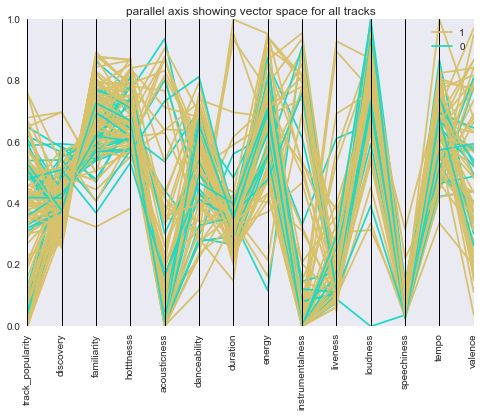

In [123]:
from pandas.tools.plotting import parallel_coordinates
plt.figure()
df_all2 = df_all.copy()
df_all2 = df_all.drop(['key', 'time_signature','mode'], axis=1)

# to_standardize = ['duration','tempo','track_popularity','loudness']
# standardize = lambda x: (x-x.mean())/x.std()
# df_all2[to_standardize] = df_all2[to_standardize].apply(standardize)

to_normalize = ['duration', 'tempo']
df_all2[to_normalize] = df_all2[to_normalize].apply(lambda x: x/x.max())
df_all2['track_popularity'] /= 100
df_all2['loudness'] = df_all2['loudness'] - df_all2['loudness'].min()
df_all2['loudness'] = df_all2['loudness'] / df_all2['loudness'].max()

parallel_coordinates(df_all2, 'love')
plt.xticks(rotation='90')
plt.title('parallel axis showing vector space for all tracks')

In [ ]:
from pandas.tools.plotting import scatter_matrix
pd.options.display.mpl_style = 'default'
plt.figure()
df_all3 = df_all.copy()
df_all3 = df_all3.drop(['key', 'time_signature','mode'], axis=1)
favs = df_all3[df_all3['love']==1].drop('love', axis=1)
axes = pd.scatter_matrix(favs, 0.8, figsize=(10,10), diagonal='hist')
col_length = len(relavent_columns)
for i in xrange(col_length):
    for j in xrange(col_length):
        ax = axes[i,j]
        ax.set_xticks([])
        ax.xaxis.label.set_rotation(90)
        ax.set_yticks([])
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.labelpad = 50
        ax.grid(True)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.gcf().suptitle('SPLOM for songs I "Love"')
plt.show()

In [ ]:
plt.figure()
axes = pd.scatter_matrix(df_all3[df_all3['love']==0], 0.2, figsize=(5,5), diagonal='kde')
col_length = len(relavent_columns)
for i in xrange(col_length):
    for j in xrange(col_length):
        ax = axes[i,j]
        ax.set_xticks([])
        ax.xaxis.label.set_rotation(90)
        ax.set_yticks([])
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.labelpad = 50
plt.xticks(rotation='vertical')
plt.yticks([],rotation='horizontal')
plt.title('SPLOM for songs I just "Like"')

In [ ]:
df_all